In [2]:
import torch
import torch.utils
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train= True, download=True, transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train= False, download=True, transform= transforms.Compose([transforms.ToTensor()]))


trainset = torch.utils.data.DataLoader(train, batch_size=20,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=20, shuffle=True)

In [3]:
import torch.nn as nn
import torch.nn.functional as F



In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation functiion relu
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
x = torch.rand((28,28))

x = x.view(-1, 28* 28) ## means -1 helps it be ready for any shape

In [6]:
output = net(x)
output

tensor([[-2.3088, -2.2946, -2.2364, -2.2278, -2.4085, -2.3712, -2.3009, -2.3171,
         -2.2555, -2.3191]], grad_fn=<LogSoftmaxBackward0>)

In [7]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)



for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0879, grad_fn=<NllLossBackward0>)
tensor(0.0724, grad_fn=<NllLossBackward0>)
tensor(0.1316, grad_fn=<NllLossBackward0>)


In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output): # Provides an index (idx) and the corresponding element (i) from the output tensor.
            #idx: Index of the current prediction (0 to batch_size - 1).
            #i: Log probabilities for the 10 classes of the current sample (shape: [10]).
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]: #Compares the predicted class with the true label.
                ''' touch.argmax(i)Finds the index of the maximum value in i, which corresponds to the predicted class. 
                    y[idx]: Retrieves the true label for the current sample from the y tensor.
                    y: A 1D tensor of shape [batch_size], containing the ground truth labels for the batch.
                    y[idx]: True label for the sample at index idx.'''
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.97


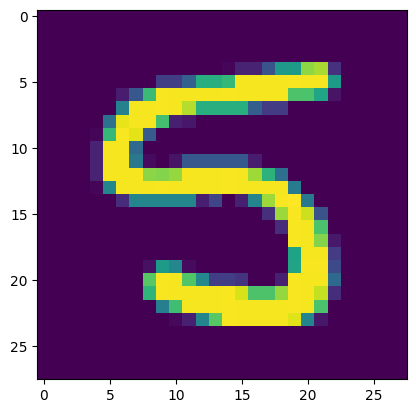

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X[6].view(28,28))
plt.show()

In [11]:
print(torch.argmax(net(X[6].view(-1,784))[0]))

tensor(5)
